# Import Statements

In [1]:
import os, csv, re, json, string, ast, pickle
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable as PT
from pprint import pprint
from datetime import datetime
import matplotlib.colors as mcolors
from collections import Counter

# nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

# tweepy
import tweepy

# wordcloud
from wordcloud import WordCloud, STOPWORDS

# gensim
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess

# pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

In [67]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric
from math import sqrt

In [70]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [130]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict

In [135]:
def return_recommendations(inferences, num_rec = 5):
    """
    Method that takes in predictions and returns the top k similarly rated products.
    """
    most_similar_n = defaultdict(list)
    for user_id, item_id, user_rating, estimated_rating, _others in inferences:
        # storing the item_id and estimated_rating for each user_id
        most_similar_n[user_id].append((item_id, estimated_rating))
        
    # sorting and returning the top most recommendations
    for user_id, user_prod_ratings in most_similar_n.items():
        user_prod_ratings.sort(key = lambda prod: prod[1], reverse=True)
        # re assiging the top sorted products
        most_similar_n[user_id] = user_prod_ratings[:num_rec]
        
    return most_similar_n

In [2]:
# reviews_path = r"C:\Project_Files\VT\SecondSem\SMA\Project\datasets\amazon-meta.txt\Magazine_Subscriptions\Magazine_Subscriptions.json"

In [141]:
reviews_path = os.path.join(os.getcwd(), r"..\datasets\Magazine_Subscriptions.json")

In [3]:
reviews_df = pd.read_json(reviews_path, lines=True)

In [4]:
reviews_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN
2,3,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN


In [6]:
reviews_df.shape

(89689, 12)

In [5]:
reviews_df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'style',
       'image'],
      dtype='object')

In [7]:
reviews_df.describe(include='all')

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
count,89689.000000,24103,89689,89689,89689,89689,89687,89656,89670,8.968900e+04,51398,135
unique,NaN,287,2,5804,72098,2428,58399,79582,51160,NaN,2,130
top,NaN,2,True,"02 20, 2015",A3JPFWKS83R49V,B00005NIOH,Amazon Customer,Great magazine,Five Stars,NaN,{'Format:': ' Print Magazine'},[https://images-na.ssl-images-amazon.com/image...
freq,NaN,6318,58654,146,55,1718,4833,233,14964,NaN,37638,2
mean,4.036638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.389447e+09,NaN,NaN
std,1.419791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.039430e+08,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.004054e+09,NaN,NaN
25%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.355184e+09,NaN,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.414109e+09,NaN,NaN
75%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.461542e+09,NaN,NaN


The most important columns for this analysis are **overall, vote, reviewTime, asin, reviewText**

In [8]:
null_data = pd.DataFrame(reviews_df.isnull().mean() * 100)
null_data

,0
overall,0.000000
vote,73.126024
verified,0.000000
reviewTime,0.000000
reviewerID,0.000000
asin,0.000000
reviewerName,0.002230
reviewText,0.036794
summary,0.021184
unixReviewTime,0.000000


In [9]:
reviews_df.reviewText.isnull().value_counts()

False    89656
True        33
Name: reviewText, dtype: int64

In [10]:
reviews_df = reviews_df[reviews_df.reviewText.notna()]

In [11]:
reviews_df.shape

(89656, 12)

In [26]:
essentials = reviews_df[["overall", "unixReviewTime", "reviewerID", "asin", "reviewText"]]

In [27]:
essentials.rename(columns={'overall': 'rating'}, inplace=True)

C:\Project_Files\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [28]:
essentials.head()

,rating,unixReviewTime,reviewerID,asin,reviewText
0,5,1005177600,AH2IFH762VY5U,B00005N7P0,"for computer enthusiast, MaxPC is a welcome si..."
1,5,1004486400,AOSFI0JEYU4XM,B00005N7P0,Thank god this is not a Ziff Davis publication...
2,3,1174694400,A3JPFWKS83R49V,B00005N7OJ,Antiques Magazine is a publication made for an...
3,5,1163116800,A19FKU6JZQ2ECJ,B00005N7OJ,This beautiful magazine is in itself a work of...
4,5,1405296000,A25MDGOMZ2GALN,B00005N7P0,A great read every issue.


In [16]:
import time

def timeStamp(timStr):
    mm_dd, year = timStr.split(",")
    mm, dd = mm_dd.split(" ")
    year = year.strip()
    date = f"{mm}/{dd}/{year}"
    return int(time.mktime(datetime.strptime(date,'%m/%d/%Y').timetuple()))
    


In [29]:
essentials.head()

,rating,unixReviewTime,reviewerID,asin,reviewText
0,5,1005177600,AH2IFH762VY5U,B00005N7P0,"for computer enthusiast, MaxPC is a welcome si..."
1,5,1004486400,AOSFI0JEYU4XM,B00005N7P0,Thank god this is not a Ziff Davis publication...
2,3,1174694400,A3JPFWKS83R49V,B00005N7OJ,Antiques Magazine is a publication made for an...
3,5,1163116800,A19FKU6JZQ2ECJ,B00005N7OJ,This beautiful magazine is in itself a work of...
4,5,1405296000,A25MDGOMZ2GALN,B00005N7P0,A great read every issue.


C:\Project_Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

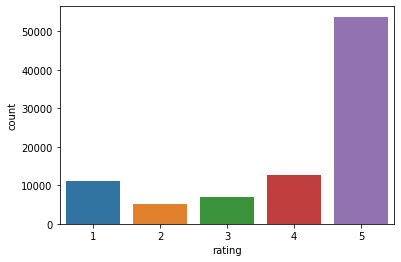

In [31]:
sns.countplot(essentials.rating)

In [33]:
# number of unique reviewers
len(essentials.reviewerID.unique()) / essentials.shape[0]

0.8038614258945302

**80%** of the reviewers are unique

# Top Product based on sales

In [35]:
temp1 = essentials.asin.value_counts()
temp2 = essentials.asin.unique()

top_15_products = pd.DataFrame(
    list(zip(temp2[0:16],temp1[0:16])),columns =['ASIN_ProductID', 'Count']
)

In [36]:
top_15_products

,ASIN_ProductID,Count
0,B00005N7P0,1718
1,B00005N7OJ,1537
2,B00005N7Q1,1480
3,B00005N7OD,1409
4,B00005N7PS,1338
5,B00005N7OU,1244
6,B00005N7QC,1064
7,B00005N7PA,977
8,B00005N7OV,965
9,B00005N7RD,949


<AxesSubplot:title={'center':'Top 7 Products'}, xlabel='ASIN_ProductID', ylabel='Count'>

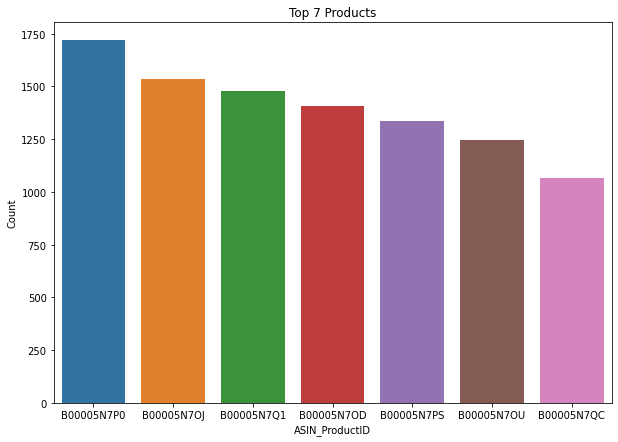

In [37]:
# Plotting top 7 products
plt.figure(figsize=(10,7))
plt.title("Top 7 Products")
sns.barplot(x=top_15_products['ASIN_ProductID'].head(7),y=top_15_products['Count'].head(7))


# Users who placed most number of orders

In [38]:
temp1 = essentials.reviewerID.value_counts()
temp2 = essentials.reviewerID.unique()

top_15_users = pd.DataFrame(
    list(zip(temp2[0:16],temp1[0:16])),columns =['ReviewerID', 'Count']
)

<AxesSubplot:title={'center':'User Count vs Number of Products Ordered'}, xlabel='# users', ylabel='order count'>

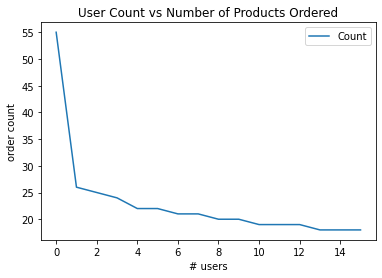

In [44]:
top_15_users.plot(title="User Count vs Number of Products Ordered", xlabel="# users", ylabel="order count")

In [39]:
top_15_users

,ReviewerID,Count
0,AH2IFH762VY5U,55
1,AOSFI0JEYU4XM,26
2,A3JPFWKS83R49V,25
3,A19FKU6JZQ2ECJ,24
4,A25MDGOMZ2GALN,22
5,A3XT9XXWXFMJ1,22
6,A3ERU005ES1IHT,21
7,AC2278WPK3EU,21
8,A3QRR8PSCBI07C,20
9,A5QQOOZJOVPSF,20


# High Quality products

In [40]:
top_rated_products = essentials[essentials.rating >= 3.5]
print(f"Count of top rated products: {top_rated_products.shape[0]}")

Count of top rated products: 66436


# Machine Learning Model Setup

In [45]:
essentials.drop('unixReviewTime', axis=1, inplace=True)

C:\Project_Files\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
essentials.head()

,rating,reviewerID,asin,reviewText
0,5,AH2IFH762VY5U,B00005N7P0,"for computer enthusiast, MaxPC is a welcome si..."
1,5,AOSFI0JEYU4XM,B00005N7P0,Thank god this is not a Ziff Davis publication...
2,3,A3JPFWKS83R49V,B00005N7OJ,Antiques Magazine is a publication made for an...
3,5,A19FKU6JZQ2ECJ,B00005N7OJ,This beautiful magazine is in itself a work of...
4,5,A25MDGOMZ2GALN,B00005N7P0,A great read every issue.


In [48]:
training_data, testing_data = train_test_split(
    essentials, test_size = 0.25, random_state = 42
)

In [50]:
training_data.shape, testing_data.shape

((67242, 4), (22414, 4))

In [51]:
# Recommendations based on top selling products
training_data_top = training_data.groupby('asin').mean()
training_data_top = training_data_top.reset_index()

In [52]:
training_data_top.head()

,asin,rating
0,B00005N7NQ,3.732558
1,B00005N7O3,3.250000
2,B00005N7O4,4.000000
3,B00005N7O6,4.613636
4,B00005N7O9,4.375000


In [53]:
training_data_top_sort = training_data_top.sort_values(['rating', 'asin'], ascending=False)
training_data_top_sort.head()

,asin,rating
2315,B01HIZSSQM,5.0
2311,B01HI8V1AE,5.0
2303,B01H6WOLWC,5.0
2299,B01H0Q1XL6,5.0
2296,B01GCV5K2S,5.0


In [54]:
train_data_grped = training_data.groupby('asin')['rating'].count().sort_values(ascending=False)
train_data_grped.head(8)

asin
B00005NIOH    1293
B00005N7Q1    1145
B00005N7SC    1137
B00007B10Y    1034
B001LF4EVO     995
B00005R8BR     926
B000IOEJ8W     806
B000ICB4T6     741
Name: rating, dtype: int64

In [55]:
avg_ratings_cnt = pd.DataFrame(training_data.groupby('asin')['rating'].mean())
avg_ratings_cnt['rating_cnts'] = pd.DataFrame(training_data.groupby('asin')['rating'].count())


In [56]:
avg_ratings_cnt.head(7)

,rating,rating_cnts
asin,,
B00005N7NQ,3.732558,86
B00005N7O3,3.250000,4
B00005N7O4,4.000000,4
B00005N7O6,4.613636,44
B00005N7O9,4.375000,16
B00005N7OA,4.153846,13
B00005N7OC,2.636364,22


In [60]:
inference_df = testing_data[['reviewerID', 'asin', 'rating']]
inference_df.head(6)

,reviewerID,asin,rating
55801,AS2PPXLXRMBA8,B000IOEJ8W,5
81807,A1E2LJ1Q7EADLU,B000FG5MIO,4
40689,A1UI9H2IUA6T4Q,B00008BFWB,5
31651,A1741EAW0YEC40,B00006KSP0,5
11297,A1Q5E2QAHUHMCE,B00005N7SG,4
38962,A27O3QYO5HLG06,B00007AXQL,4


In [61]:
inference_df.rename(columns = {'rating' : 'ground_truth_ratings'}, inplace=True)


C:\Project_Files\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [62]:
inference_df = inference_df.merge(training_data_top_sort, 
                        left_on='asin', 
                        right_on = 'asin')


In [65]:
inference_df.rename(columns = {'rating' : 'predicted_ratings'}, inplace = True)


In [66]:
inference_df.head(6)

,reviewerID,asin,ground_truth_ratings,predicted_ratings
0,AS2PPXLXRMBA8,B000IOEJ8W,5,3.712159
1,A3JN8E6LYGLO0,B000IOEJ8W,5,3.712159
2,AKHRLKG1S36KE,B000IOEJ8W,5,3.712159
3,AIQAA1539B6HB,B000IOEJ8W,1,3.712159
4,A3SMNUFNMGCBPH,B000IOEJ8W,4,3.712159
5,A11GSP4B7YFDJM,B000IOEJ8W,3,3.712159


In [68]:
MeanSquareError = metric.mean_squared_error(
    inference_df.ground_truth_ratings,
    inference_df.predicted_ratings
)

In [69]:
print(f"The Root Mean Square Error Value when avg rating is predicted for every product: {sqrt(MeanSquareError)}")

The Root Mean Square Error Value when avg rating is predicted for every product: 1.3906699425459195


In [85]:
reviewerID = essentials.groupby('reviewerID').count()
topReviewer = reviewerID[reviewerID.rating >= 3].index

In [86]:
topReviewers_ratings_df = essentials[essentials.reviewerID.isin(topReviewer)]

In [87]:
topReviewers_ratings_df.shape

(12681, 4)

In [88]:
essentials.shape

(89656, 4)

In [89]:
topReviewers_ratings_df.sort_values(by='rating', ascending=False).head(6)


,rating,reviewerID,asin,reviewText
45825,5,A28ON45PY8CGG5,B000BI1O4M,Those of us with Motorhomes are always looking...
52647,5,A3SL2CJM8EVCKQ,B000ILY9LW,Great
52604,5,A4DRRNJH8SYPD,B000ILVN1G,Photography magazines offer a great learning e...
52608,5,A20AOY7UXJA710,B000ILVN1G,"This magazine, along with&nbsp;<a data-hook=""p..."
52632,5,A2TWI1I7ZYXQJV,B000ILVN1G,good reviews and useful information - not just...
52635,5,AEJAGHLC675A7,B000ILVN1G,It's good to find such full-fledged magazines ...


In [90]:
asinID = essentials.groupby('asin').count()
top_asins = asinID[asinID.rating >= 3].index
top_asin_ratings_df = topReviewers_ratings_df[
    topReviewers_ratings_df.asin.isin(top_asins)
]
top_asin_ratings_df.sort_values(by='rating', ascending=False).head(6)


,rating,reviewerID,asin,reviewText
89682,5,A2XSSQH4VO5B1L,B01HI8V1C2,Im a Rangers & Mavericks fan and I still remem...
68740,5,A3GA09FYFKL4EY,B00D8FZIHE,"I subscribe to several fashion magazines, and ..."
68592,5,A1GE78P2NKDI3,B00AHK8D02,"If you love diddling like I do, the magazine g..."
39255,5,AHOEOFSFKD5KI,B00007AWXX,Easy and convenient
39254,5,A38OCEOMU8XOX4,B00007AWXX,I'm not sure what I can say about this. If you...
68593,5,A3O8F15U1GP1PC,B00AHK8D02,I ordered this magazine for my husband. He ha...


In [91]:
top_asin_ratings_df.shape

(12587, 4)

In [92]:
# converting data to surprise reader format
surprise_reader = Reader(rating_scale = (0.1, 5.0))

In [93]:
surprise_data = Dataset.load_from_df(
    top_asin_ratings_df[['reviewerID', 'asin', 'rating']],
    surprise_reader)


In [95]:
# Training the Model
training_set, testing_set = train_test_split(surprise_data, 
                                             test_size=0.25,
                                             random_state=42)


In [96]:
training_set.__class__, testing_set.__class__

(surprise.trainset.Trainset, list)

# K-Nearest Neighbors

In [98]:
knn_model_10 = KNNWithMeans(k=10, min_k=6, 
                         sim_options={'name': 'pearson_baseline', 'user_based': True})
knn_model_10.fit(training_set)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


C:\Project_Files\Anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sim = construction_func[name](*args)


Done computing similarity matrix.


In [100]:
knn_model_15 = KNNWithMeans(k=15, min_k=6, 
                         sim_options={'name': 'pearson_baseline', 'user_based': True})
knn_model_15.fit(training_set)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


C:\Project_Files\Anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sim = construction_func[name](*args)


Done computing similarity matrix.


In [101]:
knn_model_20 = KNNWithMeans(k=20, min_k=6, 
                         sim_options={'name': 'pearson_baseline', 'user_based': True})
knn_model_20.fit(training_set)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


C:\Project_Files\Anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sim = construction_func[name](*args)


Done computing similarity matrix.


# SVD

In [103]:
SVD?

In [104]:
svd_model_50 = SVD(n_factors=50,reg_all=0.02)
svd_model_50.fit(training_set)

In [105]:
svd_model_25 = SVD(n_factors=25,reg_all=0.02)
svd_model_25.fit(training_set)

In [106]:
svd_model_75 = SVD(n_factors=75,reg_all=0.02)
svd_model_75.fit(training_set)

# Model Evaluation

In [114]:
eval_table = PT()
# print(eval_table)
eval_table.field_names = ["Model Type", "RMSE Error"]
eval_table.add_row(["Avg Rating / Popularity Model", sqrt(MeanSquareError)])

In [107]:
# K-Nearest Neighbor
knn_10_test_predictions = knn_model_10.test(testing_set)
knn_15_test_predictions = knn_model_15.test(testing_set)
knn_20_test_predictions = knn_model_20.test(testing_set)

In [108]:
knn_10_test_predictions[0]

Prediction(uid='AMMF4CU1RHJOW', iid='B000XXDJ70', r_ui=5.0, est=5.0, details={'actual_k': 10, 'was_impossible': False})

In [109]:
accuracy.rmse(knn_10_test_predictions)

RMSE: 1.0308


1.0308046484378213

In [115]:
eval_table.add_row(["KNN k=10", accuracy.rmse(knn_10_test_predictions)])
eval_table.add_row(["KNN k=15", accuracy.rmse(knn_15_test_predictions)])
eval_table.add_row(["KNN k=20", accuracy.rmse(knn_20_test_predictions)])

RMSE: 1.0308
RMSE: 1.0307
RMSE: 1.0308


In [116]:
# SVD
svd_25_test_predictions = svd_model_25.test(testing_set)
svd_50_test_predictions = svd_model_50.test(testing_set)
svd_75_test_predictions = svd_model_75.test(testing_set)

In [117]:
eval_table.add_row(["SVD n_factors=25", accuracy.rmse(svd_25_test_predictions)])
eval_table.add_row(["SVD n_factors=50", accuracy.rmse(svd_50_test_predictions)])
eval_table.add_row(["SVD n_factors=75", accuracy.rmse(svd_75_test_predictions)])

RMSE: 1.0523
RMSE: 1.0514
RMSE: 1.0526


In [118]:
print(eval_table)

+-------------------------------+--------------------+
|           Model Type          |     RMSE Error     |
+-------------------------------+--------------------+
| Avg Rating / Popularity Model | 1.3906699425459195 |
|            KNN k=10           | 1.0308046484378213 |
|            KNN k=15           | 1.030743460305612  |
|            KNN k=20           | 1.0307797066874886 |
|        SVD n_factors=25       | 1.0522769620277779 |
|        SVD n_factors=50       | 1.0514043154916968 |
|        SVD n_factors=75       | 1.0526196979201865 |
+-------------------------------+--------------------+


# Hyper Parameter Tuning

In [120]:
svd_param_grid = {
    'n_factors' : list(range(5, 100, 10)),
    'reg_all': [0.01, 0.02, 0.03]
}

In [121]:
svd_grid_search = GridSearchCV(
    SVD,
    svd_param_grid,
    measures = ['rmse'],
    cv = 5,
    refit = True
)

In [122]:
svd_grid_search.fit(surprise_data)

In [123]:
svd_grid_search.best_params

{'rmse': {'n_factors': 85, 'reg_all': 0.02}}

In [125]:
svd_cv_testing = svd_grid_search.test(testing_set)

In [127]:
accuracy.rmse(svd_cv_testing)

RMSE: 0.7126


0.712646164126399

In [128]:
eval_table.add_row(["Best SVD n_factors=85", accuracy.rmse(svd_cv_testing)])

RMSE: 0.7126


In [129]:
print(eval_table)

+-------------------------------+--------------------+
|           Model Type          |     RMSE Error     |
+-------------------------------+--------------------+
| Avg Rating / Popularity Model | 1.3906699425459195 |
|            KNN k=10           | 1.0308046484378213 |
|            KNN k=15           | 1.030743460305612  |
|            KNN k=20           | 1.0307797066874886 |
|        SVD n_factors=25       | 1.0522769620277779 |
|        SVD n_factors=50       | 1.0514043154916968 |
|        SVD n_factors=75       | 1.0526196979201865 |
|     Best SVD n_factors=85     | 0.712646164126399  |
+-------------------------------+--------------------+


In [131]:
for x in svd_cv_testing:
    print(x)

user: AMMF4CU1RHJOW item: B000XXDJ70 r_ui = 5.00   est = 4.62   {'was_impossible': False}
user: A2VE83MZF98ITY item: B00005N7QI r_ui = 3.00   est = 3.79   {'was_impossible': False}
user: A3BK05430UFNJO item: B00005N7QJ r_ui = 5.00   est = 4.51   {'was_impossible': False}
user: A1T17LMQABMBN5 item: B00005N7QC r_ui = 5.00   est = 4.56   {'was_impossible': False}
user: A2NLFKCU8MIITP item: B00EZB37X2 r_ui = 3.00   est = 3.70   {'was_impossible': False}
user: A3T07HNBMX9MZH item: B00005R8BR r_ui = 5.00   est = 4.59   {'was_impossible': False}
user: A3OH101U0CPUC7 item: B00007B1I4 r_ui = 2.00   est = 3.58   {'was_impossible': False}
user: A2BKA76GOU3P8H item: B00008RUJP r_ui = 5.00   est = 4.22   {'was_impossible': False}
user: A1BAW0XRRGU225 item: B00005NIOW r_ui = 5.00   est = 4.62   {'was_impossible': False}
user: AJJZHGRYFB4ES item: B000IOEJ8W r_ui = 5.00   est = 4.50   {'was_impossible': False}
user: A1CTG6AYRRKRVE item: B00005N7Q1 r_ui = 5.00   est = 4.91   {'was_impossible': False}
u

user: A38X0ZY8RGNJHD item: B000FTJ7JQ r_ui = 3.00   est = 3.76   {'was_impossible': False}
user: A2GODLDR7PQZAE item: B000IOEJ8W r_ui = 5.00   est = 4.64   {'was_impossible': False}
user: A26KYDJOAGI05S item: B000ICB4X2 r_ui = 4.00   est = 3.56   {'was_impossible': False}
user: A2B75EB66TX8OK item: B001W8Q9NG r_ui = 5.00   est = 4.52   {'was_impossible': False}
user: A1Y2ODWY3KETAO item: B00EVV77A0 r_ui = 5.00   est = 4.77   {'was_impossible': False}
user: AXCNMW28WAXVN item: B015GHGCSA r_ui = 4.00   est = 4.02   {'was_impossible': False}
user: AEM3ZZ9E9ISLE item: B01CF3ECNK r_ui = 5.00   est = 4.69   {'was_impossible': False}
user: A1Q4PB77PL3FHG item: B00005N7PH r_ui = 5.00   est = 4.82   {'was_impossible': False}
user: A1UZMT8CWH7ZIH item: B00005N7SM r_ui = 4.00   est = 4.24   {'was_impossible': False}
user: A3UJBR4ELXSTNR item: B00005N7Q1 r_ui = 5.00   est = 4.81   {'was_impossible': False}
user: A3FVAWZNKW9GX item: B000060MJC r_ui = 5.00   est = 4.54   {'was_impossible': False}
us

In [136]:
most_similar_5 = return_recommendations(svd_cv_testing, num_rec = 5)

In [139]:
for user_id, user_ratings in most_similar_5.items():
    print("#---------------------------------")
    print(f"Products Recommended for Reviewer: {user_id}: \n")
    print([item_id for (item_id, item_rating) in user_ratings])    

#---------------------------------
Products Recommended for Reviewer: AMMF4CU1RHJOW: 

['B000XXDJ70']
#---------------------------------
Products Recommended for Reviewer: A2VE83MZF98ITY: 

['B00006K5EF', 'B000060MGT', 'B00005N7QI']
#---------------------------------
Products Recommended for Reviewer: A3BK05430UFNJO: 

['B005YHGI0K', 'B00005N7QJ']
#---------------------------------
Products Recommended for Reviewer: A1T17LMQABMBN5: 

['B00005NIOS', 'B00005N7QC', 'B00005NIPX']
#---------------------------------
Products Recommended for Reviewer: A2NLFKCU8MIITP: 

['B001LF4EVO', 'B00EZB37X2', 'B005DNA3LU']
#---------------------------------
Products Recommended for Reviewer: A3T07HNBMX9MZH: 

['B00005R8BR', 'B000IOEK7M']
#---------------------------------
Products Recommended for Reviewer: A3OH101U0CPUC7: 

['B00007B1I4', 'B00005N7SB']
#---------------------------------
Products Recommended for Reviewer: A2BKA76GOU3P8H: 

['B00008RUJP']
#---------------------------------
Products Recomme

['B00005N7TB']
#---------------------------------
Products Recommended for Reviewer: A2TLGV4694PY6N: 

['B00005N7SC', 'B000ILY9LW']
#---------------------------------
Products Recommended for Reviewer: A3NBMO2DQ7HGGN: 

['B00005NIOH', 'B00007BK3L', 'B00VXCWUZC']
#---------------------------------
Products Recommended for Reviewer: A2F0VOHU5UX7BR: 

['B00EVV77A0', 'B000ILY9LW']
#---------------------------------
Products Recommended for Reviewer: A1WA7643EU5223: 

['B001W8Q9OU']
#---------------------------------
Products Recommended for Reviewer: A38J5TMD535OJT: 

['B00007AVYI']
#---------------------------------
Products Recommended for Reviewer: A2YTSR7B9CC89S: 

['B001LF4EVO', 'B01CF3ECNK', 'B000FTJ7JQ']
#---------------------------------
Products Recommended for Reviewer: A1V8KPZ51L4M2K: 

['B00007B10Y', 'B00EZB37X2', 'B00008RUJP', 'B00005NIPX', 'B00005N7TX']
#---------------------------------
Products Recommended for Reviewer: A3TQHBMCOF21H3: 

['B000FTJ7JQ', 'B01CF3ECNK']
#------

Products Recommended for Reviewer: A2LXX47A0KMJVX: 

['B00005N7TL']
#---------------------------------
Products Recommended for Reviewer: A1VK7JLL9I9VYY: 

['B00X6LREJU']
#---------------------------------
Products Recommended for Reviewer: A34900KFSU707V: 

['B000XBBZ96']
#---------------------------------
Products Recommended for Reviewer: A29CKNGVO8KEVI: 

['B00005NIOH']
#---------------------------------
Products Recommended for Reviewer: A3NHR5Q3YLRAZJ: 

['B000UECNSI']
#---------------------------------
Products Recommended for Reviewer: A3TJLJDW2QI53R: 

['B000XXDJ70']
#---------------------------------
Products Recommended for Reviewer: AEFAZU2T4NYTR: 

['B000IOEJCI', 'B00005N7QG', 'B00005N7PN', 'B000ILY9LW', 'B00005NIOA']
#---------------------------------
Products Recommended for Reviewer: AQOB1JRCC5Q5F: 

['B0037STB02', 'B000IJ7RQ8']
#---------------------------------
Products Recommended for Reviewer: ANTGMN2RXN8VN: 

['B00007AZWJ', 'B000FTJ7JQ', 'B01CF3ECNK']
#------------

#---------------------------------
Products Recommended for Reviewer: AWTN3LLRLP4M6: 

['B000WM6NZW']
#---------------------------------
Products Recommended for Reviewer: A212YEMCXGJABC: 

['B00005NIOW']
#---------------------------------
Products Recommended for Reviewer: AW8L026GJ33CO: 

['B000IOEJBO']
#---------------------------------
Products Recommended for Reviewer: A3S3R88HA0HZG3: 

['B00005N7TL']
#---------------------------------
Products Recommended for Reviewer: A14TR6YD2W23A3: 

['B00079RO7G']
#---------------------------------
Products Recommended for Reviewer: A28YK7B27X3N0N: 

['B000INBVOI']
#---------------------------------
Products Recommended for Reviewer: A168R2UBJO6Q7K: 

['B001LF4EVO']
#---------------------------------
Products Recommended for Reviewer: A3TVZFQAO2S5PS: 

['B00005NINH']
#---------------------------------
Products Recommended for Reviewer: AO80JEDFYS6MJ: 

['B00007J82Z']
#---------------------------------
Products Recommended for Reviewer: A3VNZN

# References

http://surpriselib.com/

https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD

https://github.com/SajalSinha/ProductRecommendationEngine